In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

%matplotlib inline

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [75]:
skf = StratifiedKFold(n_splits=3)
train_index, test_index = next(iter(skf.split(X, y)))

X_train = X[train_index]
y_train = y[train_index]
X_test = X[test_index]
y_test = y[test_index]

In [76]:
n_classes = np.unique(y).shape[0]

In [77]:
model = GaussianMixture(n_components=n_classes, max_iter=20, random_state=42)

In [78]:
model.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=20,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [79]:
colors = ['navy', 'turquoise', 'darkorange']

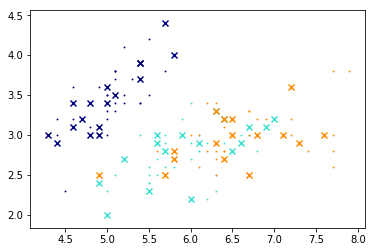

In [80]:
fig, ax = plt.subplots()
for class_, color in zip(np.sort(np.unique(y)), colors):
    data = X[y==class_]
    ax.scatter(data[:, 0], data[:, 1], s=0.8, color=color)

for class_, color in zip(np.sort(np.unique(y)), colors):
    data = X_test[y_test==class_]
    ax.scatter(data[:, 0], data[:, 1], marker='x', color=color)
plt.show()

In [81]:
y_pred = model.predict(X_train)
np.mean(y_pred.ravel() == y_train.ravel()) * 100

12.0

In [82]:
y_pred = model.predict(X_test)
np.mean(y_pred.ravel() == y_test.ravel()) * 100

8.0